In [15]:
import os
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import warnings
import shutil
warnings.filterwarnings('ignore')

In [17]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3

In [19]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Datasets", shuffle=True, image_size  = (IMAGE_SIZE, IMAGE_SIZE), batch_size = BATCH_SIZE)

Found 1221 files belonging to 3 classes.


In [21]:
classname=dataset.class_names
classname

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust']

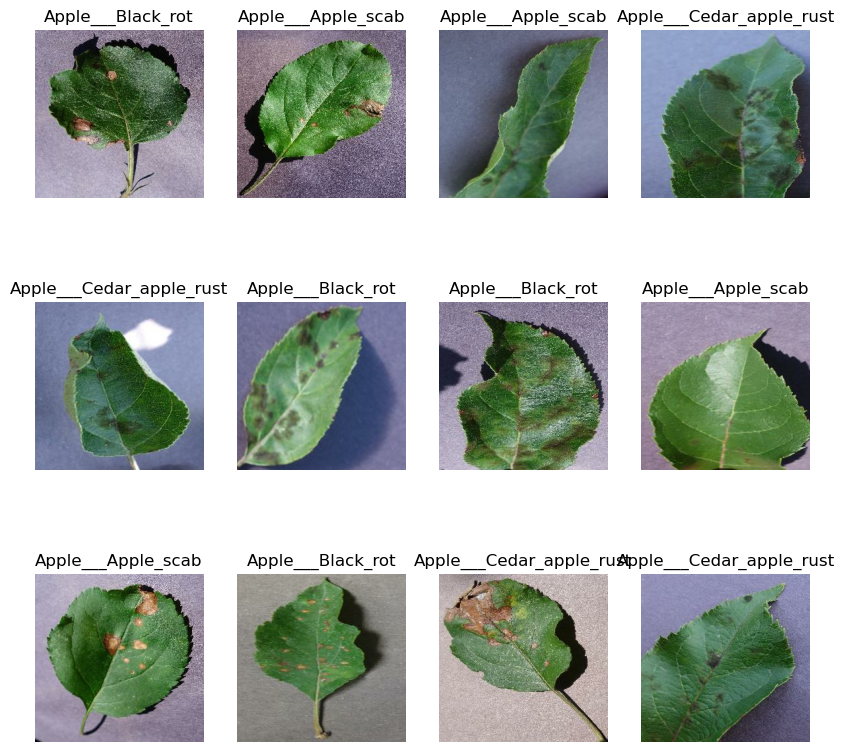

In [13]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4, i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(classname[labels_batch[i]])
        plt.axis("off")

In [11]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 0 0 2 2 1 1 0 0 1 2 2 0 1 1 0 1 1 1 0 0 0 2 2 1 2 2 0 0 2 0 2]


In [29]:
class_names = dataset.class_names

output_dir = "LabeledImages"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


In [31]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

In [33]:
for image_batch, label_batch in dataset:
    for i in range(len(image_batch)):

        label = class_names[label_batch[i]]

        img = tf.keras.preprocessing.image.array_to_img(image_batch[i])

        filename = f"{label}_{i}.jpg"
        img.save(os.path.join(output_dir, filename))

        augmented_img = data_augmentation(tf.expand_dims(image_batch[i], axis=0))
        augmented_img = tf.keras.preprocessing.image.array_to_img(tf.squeeze(augmented_img, axis=0))

        augmented_filename = f"{label}_{i}_aug.jpg"
        augmented_img.save(os.path.join(output_dir, augmented_filename))

print(f"All images (original and augmented) saved to {output_dir}")

All images (original and augmented) saved to LabeledImages
